In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [67]:
#경고무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install missingno

In [8]:
!pip install openpyxl

In [3]:
import missingno as msno

In [4]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [9]:
df = pd.read_excel("Dataset/Fastcampus/Fastcampus.xlsx")

In [20]:
# 저장한 데이터 불러오기
df = pd.read_csv("Dataset/Fastcampus/Fastcampus_.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64094 entries, 0 to 64093
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64094 non-null  int64  
 1   customer_id             64094 non-null  float64
 2   course_id               61575 non-null  float64
 3   type                    64094 non-null  object 
 4   state                   64094 non-null  object 
 5   course_title            64094 non-null  object 
 6   category_title          64088 non-null  object 
 7   format                  64094 non-null  object 
 8   completed_at            64094 non-null  object 
 9   transaction_amount      64094 non-null  int64  
 10  coupon_title            27189 non-null  object 
 11  coupon_discount_amount  27189 non-null  float64
 12  sale_price              62982 non-null  float64
 13  tax_free_amount         62982 non-null  float64
 14  pg                      53685 non-null

In [22]:
df.head(5)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 00:00:00
1,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 00:00:00
2,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 00:00:00
3,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27 00:00:00
4,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 00:00:00


In [19]:
df.head(10)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
1,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
2,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
3,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27
4,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
5,970682,478031.0,NaN,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaT
6,970695,455311.0,203146.0,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 15:43:59,149500,NaN,NaN,149500.0,149500.0,NaN,CARD,DevOps,2021-02-08
7,970704,471759.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,99000.0,NaN,CARD,UX/UI,2021-03-11
8,970703,478051.0,203499.0,PAYMENT,COMPLETED,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,업무 생산성,올인원,2021-03-28 15:49:21,118000,NaN,NaN,118000.0,118000.0,NaN,VBANK,PPT/보고서,2020-12-07
9,970715,131687.0,203533.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+,데이터사이언스,올인원,2021-03-28 16:02:18,81000,NaN,NaN,81000.0,81000.0,NaN,CARD,머신러닝,2021-01-05


In [23]:
# 타입 변경
df = df.astype({"customer_id":"int"})
df['completed_at']= pd.to_datetime(df['completed_at'])

In [24]:
# 날짜타입으로 변경
df['marketing_start_at']= pd.to_datetime(df['marketing_start_at'])

## 해볼 것

피쳐분석
* payment completed 이후 order cancelled가 없는것 -> 취소하지 않고 강의를 구매한 비율
* 취소하지 않고 구매한 강의의 공통점 찾기
* 광고를 시작한 이후의 시간의 경과에 따라서 구매율이 높아졌는지?(사실 판매시작일임)
* 쿠폰사용에 따른 피쳐들 분석
* 분야별 순구매율

이끌어낼 것
* 쿠폰 발행이 구매에 어떤 영향을 미치는지?
* 분야별 강의를 취소하지 않게하려면 어떤 조치를 위해야 하는지?

<AxesSubplot:>

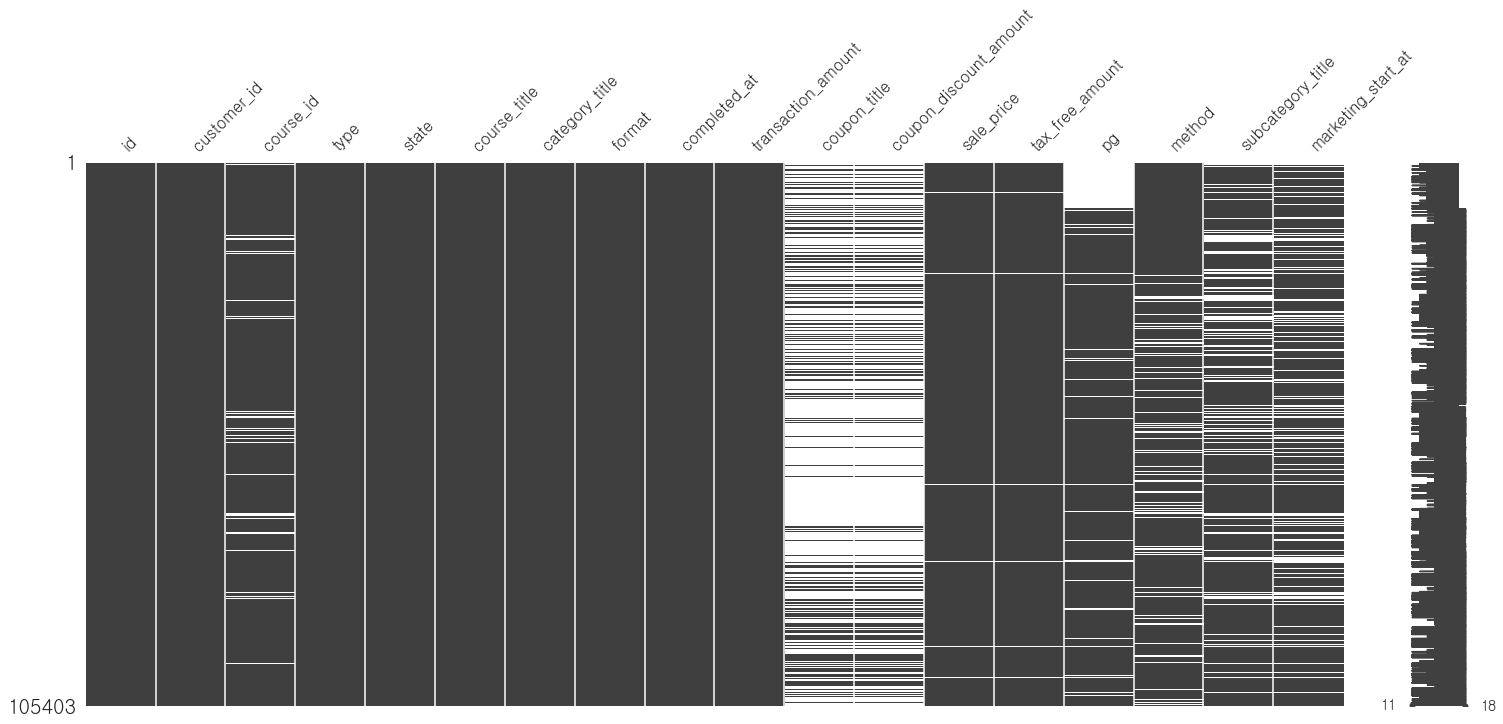

In [48]:
# 결측치 확인
msno.matrix(df=df)

In [11]:
# sale_price와 tax_free_amount가 다른것은 대부분 프로모션(현물을 주는)제품이다.

df[(df['sale_price'] != df['tax_free_amount']) & (~df['sale_price'].isnull()) & (~df['tax_free_amount'].isnull())]['course_title'].unique()

array(['스프링 아카데미아', '(TEST) 오프라인 과세 상품 결제 테스트용 상품',
       '프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼성노트북 플러스2)',
       '프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 프리패스 (5월 삼성 패키지 현물 :  삼성노트북 플러스2)',
       '프로모션 : 영상 퀄리티를 바꿔 줄 영상 제작 스킬 프리패스(5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)',
       '프로모션 : 워라밸을 완성하는 직장인 필수스킬 프리패스 (5월 삼성 패키지 현물 :  삼성노트북 플러스2)',
       '프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)',
       '프로모션 : 워라밸을 완성하는 직장인 필수스킬 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)',
       '프로모션 : 풀스택 마케터를 위한 마케팅 프리패스 (5월 삼성 패키지 현물 :  삼성노트북 플러스2)',
       '프로모션 : 영상 퀄리티를 바꿔 줄 영상 제작 스킬 프리패스 (5월 삼성 패키지 현물 :  삼성노트북 플러스2)',
       '프로모션 : 풀스택 마케터를 위한 마케팅 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)',
       '프로모션 : 시장의 흐름을 읽는 투자의 정석 프리패스  (5월 삼성 패키지 현물 :  삼성노트북 플러스2)',
       '프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)',
       '프로모션 : 시장의 흐름을 읽는 투자의 정석 프리패스(5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)',
       '프로모션 : 커리어를 UP UX/UI 디자인 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)',
       '(테스트용) 프로모션 : 기초부터 시작하는 데이터분석

In [12]:
# course_title가 null값인 경우 행 삭제 대부분 type이 Deleted이고 그것이 아닌 데이터마저도 대부분의 자료가 결측치이다.
cond = df[(df['course_title'].isnull())].index
df.drop(cond,inplace=True)

In [13]:
# type이 order나 transaction 삭제
cond = df[df['type'] == ('ORDER' or 'TRANSACTION')].index
df.drop(cond,inplace=True)

In [14]:
# state가 completed나 requested만 남기고 삭제
cond = df[df['state'] == ("PENDING" or 'CANCELLED' or 'HIDDEN' or 'DELETE')].index
df.drop(cond,inplace=True)

In [15]:
# course_title에 test, TEST, 테스트용 있는것은 일단 삭제
test = '|'.join(['test','TEST','테스트용'])

cond = df[df['course_title'].str.contains(test)].index

df.drop(cond,inplace=True)

In [16]:
# 삭제된 df에서 인덱스 재정렬
df.reset_index(drop=True,inplace=True)
df

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
1,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
2,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
3,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,CARD,NaN,2020-11-27
4,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64089,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
64090,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
64091,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
64092,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [26]:
df['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '데이터사이언스', '디자인', '마케팅',
       '크리에이티브', '투자/재테크', '교육', nan, '데이터 사이언스', '비즈니스', '지식콘텐츠', '파이낸스'],
      dtype=object)

In [25]:
# 판다스 지수표현 없애는 코드
pd.options.display.float_format = '{:.3f}'.format

In [28]:
# 카테고리 중에 데이터 사이언스 중복 값 확인
df.groupby('category_title')['id'].count()

category_title
교육            978
데이터 사이언스        6
데이터사이언스      8195
디자인          7333
마케팅          5595
부동산/금융       3409
비즈니스           36
업무 생산성       7663
영상/3D        6376
지식콘텐츠          23
크리에이티브       1054
투자/재테크       1960
파이낸스           25
프로그래밍       21435
Name: id, dtype: int64

In [29]:
# 값 변경
df['category_title'].replace("데이터 사이언스",'데이터사이언스', inplace=True)
df['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '데이터사이언스', '디자인', '마케팅',
       '크리에이티브', '투자/재테크', '교육', nan, '비즈니스', '지식콘텐츠', '파이낸스'],
      dtype=object)

In [31]:
# 다른 csv파일로 저장
df.to_csv("Dataset/Fastcampus/Fastcampus_.csv", header=True, index=False)

### 이상치 제거

In [84]:
# 이상치 탐색
# 데이터 프레임을 매개변수로 받아서 Tukey방식에 따른 이상치 관측의 인덱스 목록을 반환하는 함수 생성
def detect_outliers(df,n,features):
    outlier_indices=[]
    
    for col in features:
        # 1사분위
        Q1 = np.percentile(df[col],25)
        # 3사분위
        Q3 = np.percentile(df[col],75)
        # Interquartile range( IQR )
        IQR = Q3-Q1
        
        # 이상치 공식
        outlier_step = 1.5 * IQR
        
        # 각 특성의 이상치 인덱스 목록 결정
        outlier_list_col = df[(df[col]< Q1 - outlier_step) | (df[col]> Q3 + outlier_step)].index
        
        
        # 찾은 이상치 인덱스 추가
        outlier_indices.extend(outlier_list_col)

    # n개 이상의 이상치가 있는 것 찾기
    outlier_indices= Counter(outlier_indices)
    multiple_outliers= list(k for k, v in outlier_indices.items() if v >n)
        
    return multiple_outliers
    
Outliers_to_drop = detect_outliers(df,1,["transaction_amount","coupon_discount_amount","sale_price"])

In [86]:
# 이상치 없음.
Outliers_to_drop

[]

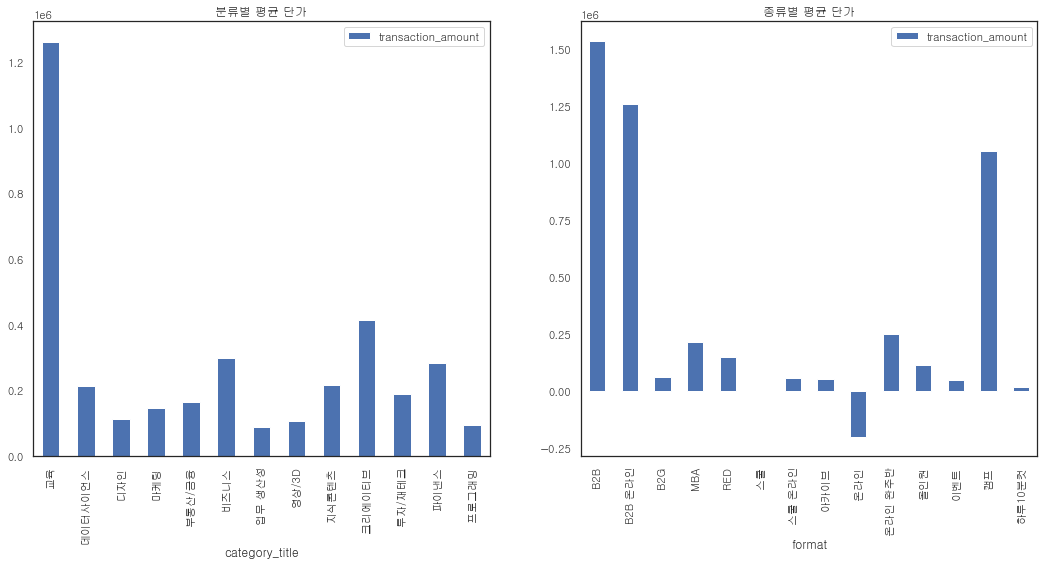

In [30]:
# 카테고리별 평균 단가 출력
f,ax = plt.subplots(1,2 ,figsize=(18,8))
df[['category_title','transaction_amount']].groupby(['category_title'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title("분류별 평균 단가")

df[['format','transaction_amount']].groupby(['format'],as_index=True).mean().plot.bar(ax=ax[1])
ax[1].set_title("종류별 평균 단가")
plt.show()

In [32]:
# format 온라인의 평균이 마이너스? -> 한 개 밖에 없는데 199000원 강의를 자유이용권으로 공짜로 했기 때문에 마이너스라고 표현한 듯
df[df['format']=='온라인']

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
19982,1078156,62566,NaN,REFUND,COMPLETED,프로모션 : 자유이용권 (3월),NaN,온라인,2021-05-26 22:06:00,-199000,NaN,NaN,199000.000,199000.000,NaN,TRANSFER,NaN,NaT


In [33]:
df.groupby("format")['id'].count()

format
B2B          552
B2B 온라인     1033
B2G          592
MBA           23
RED         3908
스쿨          1036
스쿨 온라인       643
아카이브          35
온라인            1
온라인 완주반     1678
올인원        53087
이벤트           89
캠프            44
하루10분컷      1373
Name: id, dtype: int64

In [34]:
# 관리가 뭐지? -> test 코스인 것을 알 수 있었다.
df[df['category_title']=='관리']

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at


In [35]:
# 가장 많은 결제 내역을 가진 아이디들 내림차순 정렬

df[(df['state'] == ('COMPLETED' or'REQUESTED')) & (df['type'] ==('PAYMENT' or'REFUND'))].groupby("customer_id")['id'].count().sort_values(ascending=False).head(50)

customer_id
98685     53
427973    47
158374    42
50769     39
3189      39
1189      37
40783     34
276705    33
106662    29
65665     27
20784     26
6526      22
72501     21
631       19
502821    19
417924    18
14845     16
98499     16
390054    15
273223    15
19907     15
270542    15
13443     14
455112    14
573414    14
47846     14
81583     14
210621    13
177386    13
23171     13
83327     13
128316    13
56608     13
171104    12
111060    12
39807     12
11576     12
192232    12
19892     12
420910    12
512712    12
30629     12
69151     11
7055      11
394318    11
87007     11
499543    11
479816    11
454189    11
6053      11
Name: id, dtype: int64

In [56]:
# 테스트용 계정인지 진짜 유저인지 객관적 확인 모호함.
df[(df['customer_id']==98685.000) & (df['state']==('COMPLETED'or 'REQUESTED'))& (df['type']!='ORDER')]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
5119,984635,98685.000,201998.000,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-01 10:19:28,24800,수강생 50만명 돌파 기념 감사제 쿠폰,87200.000,112000.000,112000.000,NaN,CARD,모바일앱,2020-01-14 0:00:00
6337,988664,98685.000,204342.000,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-04-03 0:08:50,55300,GA4 30% 할인쿠폰,23700.000,79000.000,79000.000,NaN,CARD,데이터마케팅,2021-04-02 0:00:00
6936,990338,98685.000,201798.000,PAYMENT,COMPLETED,올인원 패키지 : 브랜딩 2020,마케팅,올인원,2021-04-04 10:08:51,162100,NaN,NaN,162100.000,162100.000,NaN,CARD,SNS마케팅,2019-11-11 0:00:00
22004,1037244,98685.000,200399.000,PAYMENT,COMPLETED,올인원 패키지 : 리더를 위한 HR/인재경영,업무 생산성,올인원,2021-04-28 21:10:57,0,4월 1+1 페이백 이벤트 쿠폰,162100.000,111000.000,111000.000,NaN,PROMOTION,리더십,2019-03-22 0:00:00
22005,1037248,98685.000,201849.000,PAYMENT,COMPLETED,올인원 패키지 : 그로스 마케팅,마케팅,올인원,2021-04-28 21:11:43,0,4월 1+1 페이백 이벤트 쿠폰,178000.000,123000.000,123000.000,NaN,PROMOTION,데이터마케팅,2019-11-25 0:00:00
22007,1037252,98685.000,204286.000,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-04-28 21:12:57,153300,초격차 패키지 : 한번에 끝내는 3D 디자인툴 30% 할인 쿠폰,65700.000,219000.000,219000.000,INICIS,CARD,디자인툴,2021-04-23 0:00:00
23441,1041392,98685.000,204775.000,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-04-30 9:21:48,19500,NaN,NaN,19500.000,19500.000,INICIS,CARD,NaN,2021-04-28 0:00:00
28273,1054819,98685.000,204773.000,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-05-06 9:33:53,19900,NaN,NaN,19900.000,19900.000,INICIS,CARD,NaN,2021-04-28 0:00:00
33447,1069671,98685.000,204631.000,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,프로그래밍,올인원,2021-05-13 23:03:57,69000,[럭키룰렛] 올인원패키지,10000.000,79000.000,79000.000,INICIS,CARD,백엔드 개발,NaN
50599,1127326,98685.000,201520.000,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-06-08 11:12:38,32500,5월 페이백 프로모션 쿠폰,80000.000,112500.000,112500.000,INICIS,CARD,DevOps,NaN


In [36]:
# 교육의 단가가 높은이유는 대부분이 B2B 즉 기업 간 계약이라 그런 것 같다.
df[df['category_title']=='교육'][['course_title','transaction_amount']]

,course_title,transaction_amount
255,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,100000
256,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,750000
462,(B2B) 현대백화점 온라인 구독 올 플랜,600000
468,(B2B) 현대백화점 온라인 구독 올 플랜,600000
521,(B2B) 현대백화점 온라인 구독 올 플랜,600000
...,...,...
63538,(B2B) 한남대학교 2021년 가을학기 온라인 구독,300000
63584,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,2000000
63839,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,600000
63850,(B2B) 디캠프 패밀리사 온라인 구독 올 플랜 (9월),150000


In [37]:
# 카테고리가 교육일 경우 전부 B2B 강의인 것을 알 수 있다.
df[(df['category_title']=='교육')&(df['course_title'].str.contains("B2B"))]['transaction_amount']

255       100000
256       750000
462       600000
468       600000
521       600000
          ...   
63538     300000
63584    2000000
63839     600000
63850     150000
63941     600000
Name: transaction_amount, Length: 978, dtype: int64

In [39]:
# 카테고리가 교육일 경우엔 하위 카테고리는 없다.
df[df['category_title']=='교육']['subcategory_title'].isnull().any()

True

In [40]:
# 각각 변수를 만들어서 completed_at 을 월단위, 일단위로 나누었다.
com_month =df['completed_at'].dt.month
com_day = df['completed_at'].dt.day
com_weekday = df['completed_at'].dt.weekday
com_hour = df['completed_at'].dt.hour

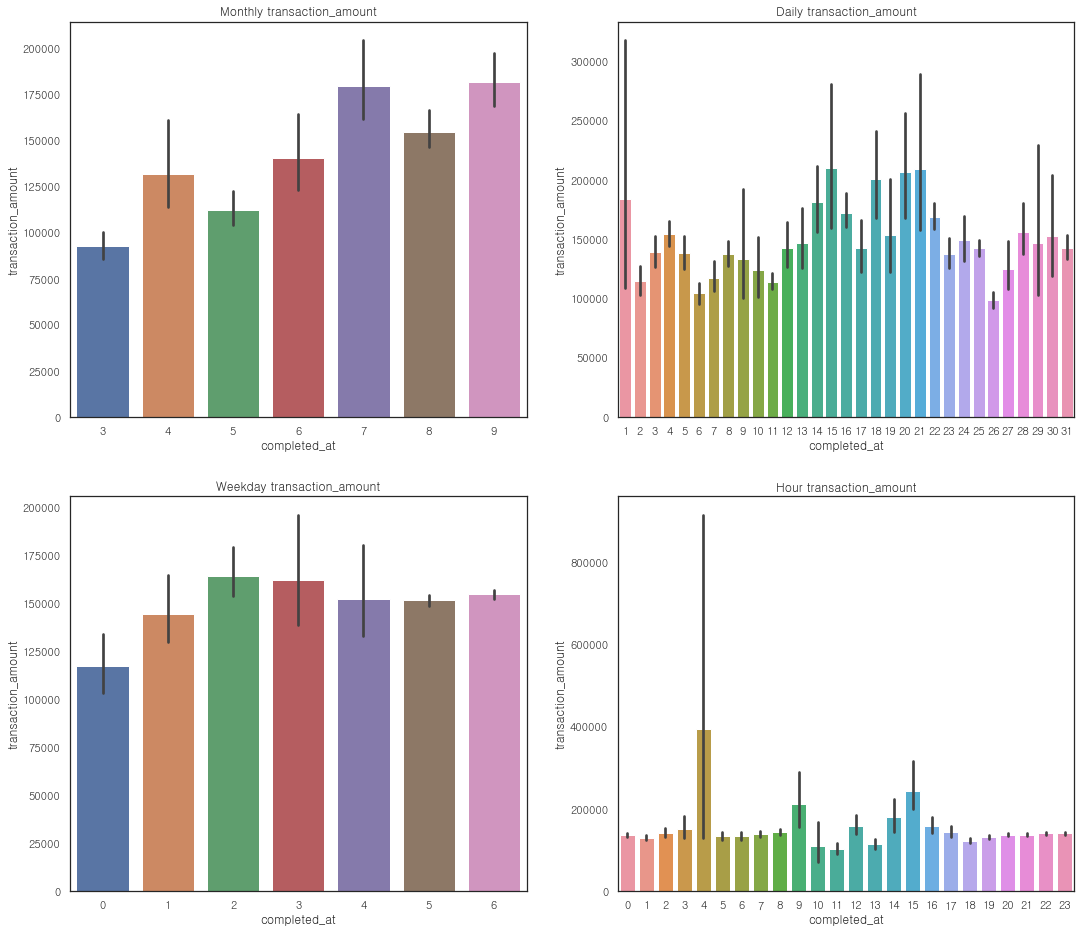

In [49]:
# 월을 x축으로 월평균 결제 금액을 y축
fig, ax= plt.subplots(2,2, figsize=(18,16))

sns.barplot(data=df, x=com_month, y='transaction_amount' ,ax=ax[0,0] )
ax[0,0].set_title("Monthly transaction_amount")
sns.barplot(data=df, x=com_day, y='transaction_amount' ,ax=ax[0,1] )
ax[0,1].set_title("Daily transaction_amount")
sns.barplot(data=df, x=com_weekday, y='transaction_amount' ,ax=ax[1,0] )
ax[1,0].set_title("Weekday transaction_amount")
sns.barplot(data=df, x=com_hour, y='transaction_amount' ,ax=ax[1,1] )
ax[1,1].set_title("Hour transaction_amount")
plt.show()

## 생각나는 것

* 시간대 별로 이끌어 낼 수 있는 인사이트가 있는가?
* 쿠폰 발행이 좋은가?
* 어떻게 돈을 많이 벌지?

### 쿠폰 
* 쿠폰을 사용했을 때 결제가 활발한가?
* 쿠폰을 줘야하는, 그리고 주지 않아도 되는 카테고리는 무엇이 있을까? (쿠폰의 값이 존재하는지와 결제 건수나 점유율 간의 상관관계?)

In [51]:
# 쿠폰 유무에 따른 데이터프레임 분할
df_cp = df[df['coupon_title'].notnull()]
df_ncp = df[df['coupon_title'].isnull()]

In [81]:
# 쿠폰 사용률은 42% 정도이다.
print(f"쿠폰 썼을 때의 결제량: {len(df_cp)}, 안 썼을 때: {len(df_ncp)}")
print(f"쿠폰 사용률 {len(df_cp)/len(df)*100}%")

쿠폰 썼을 때의 결제량: 27189, 안 썼을 때: 36905
쿠폰 사용률 42.42050737978594%


In [93]:
# 쿠폰 사용했을 때 카테고리별 결제건수
df_cp.groupby("category_title")['id'].count().sort_values(ascending=False)


category_title
프로그래밍      8638
디자인        4088
영상/3D      3415
데이터사이언스    3376
업무 생산성     3101
마케팅        1850
부동산/금융     1434
투자/재테크     1083
크리에이티브      200
비즈니스          3
지식콘텐츠         1
Name: id, dtype: int64

In [94]:
# 쿠폰 사용하지 않은 카테고리별 결제건수
df_ncp.groupby("category_title")['id'].count().sort_values(ascending=False)

category_title
프로그래밍      12797
데이터사이언스     4825
업무 생산성      4562
마케팅         3745
디자인         3245
영상/3D       2961
부동산/금융      1975
교육           978
투자/재테크       877
크리에이티브       854
비즈니스          33
파이낸스          25
지식콘텐츠         22
Name: id, dtype: int64

In [66]:
# 각각 데이터프레임의 카테고리별 결제금액의 평균을 새로운 시리즈변수에 대입
avg_ta_by_cat_cp = df_cp.groupby('category_title')['transaction_amount'].mean()
avg_ta_by_cat_ncp = df_ncp.groupby('category_title')['transaction_amount'].mean()

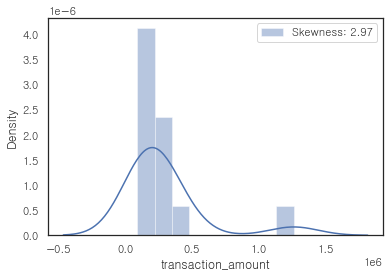

In [69]:
# skew 정도 확인 2.97로 조정이 필요하다
g = sns.distplot(avg_ta_by_cat_ncp, label='Skewness: %.2f'%(avg_ta_by_cat_ncp.skew()))
g= g.legend(loc='best')

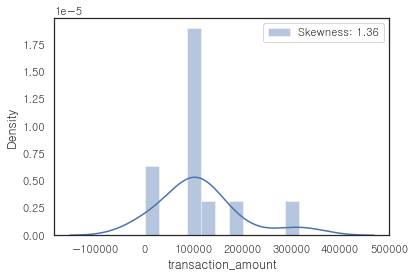

In [70]:
g = sns.distplot(avg_ta_by_cat_cp, label='Skewness: %.2f'%(avg_ta_by_cat_cp.skew()))
g= g.legend(loc='best')

In [ ]:
# 로그 취함(나중에 머신러닝 넣는다면,)

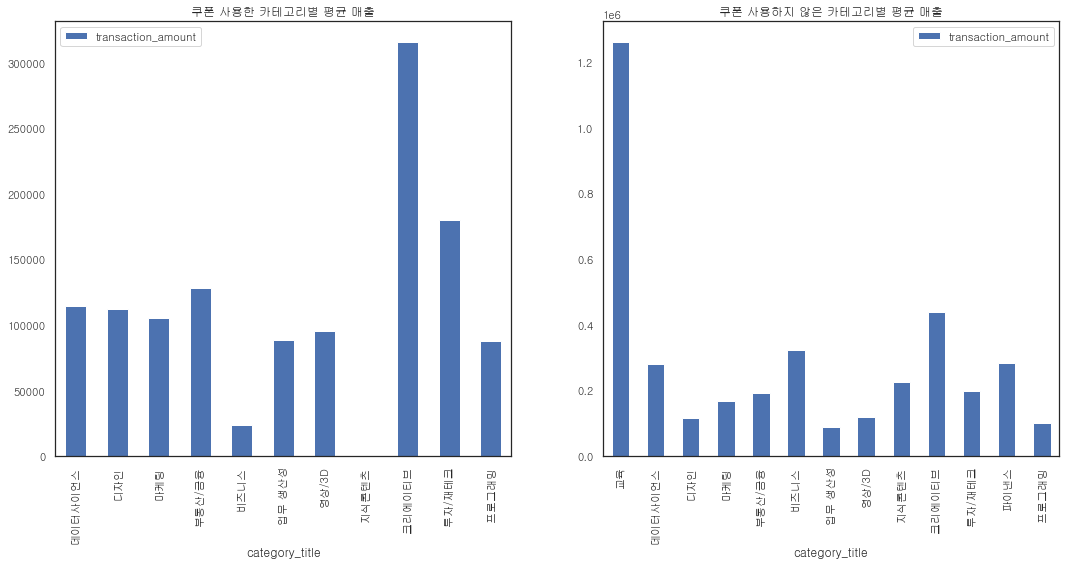

In [87]:
# 쿠폰 사용 유무에 따른 카테고리별 평균 매출
f,ax = plt.subplots(1,2 ,figsize=(18,8))
df_cp[['category_title','transaction_amount']].groupby(['category_title'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title("쿠폰 사용한 카테고리별 평균 매출")

df_ncp[['category_title','transaction_amount']].groupby(['category_title'],as_index=True).mean().plot.bar(ax=ax[1])
ax[1].set_title("쿠폰 사용하지 않은 카테고리별 평균 매출")
plt.show()

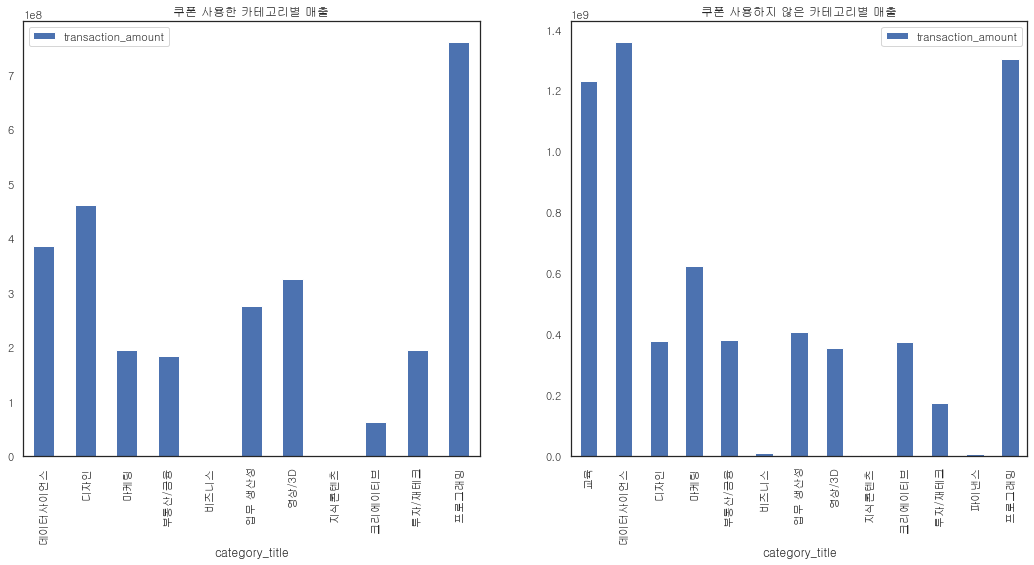

In [89]:
# 쿠폰 사용 유무에 따른 카테고리별 매출
f,ax = plt.subplots(1,2 ,figsize=(18,8))
df_cp[['category_title','transaction_amount']].groupby(['category_title'],as_index=True).sum().plot.bar(ax=ax[0])
ax[0].set_title("쿠폰 사용한 카테고리별 매출")

df_ncp[['category_title','transaction_amount']].groupby(['category_title'],as_index=True).sum().plot.bar(ax=ax[1])
ax[1].set_title("쿠폰 사용하지 않은 카테고리별 매출")
plt.show()

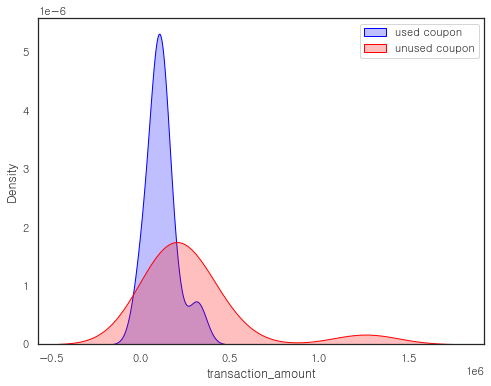

In [77]:
# 쿠폰 사용 유무에 따른 평균 매출의 빈도
plt.figure(figsize=(8,6))

sns.kdeplot(x=avg_ta_by_cat_cp, color="Blue", shade = True, label="used coupon" )
sns.kdeplot(x=avg_ta_by_cat_ncp,color ='Red', shade = True, label="unused coupon")

plt.legend()
plt.show()

In [71]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))